## Linear Algebra Series

# Part 3: Quadratic functions

Quadratic functions naturally arise when studying second order derivatives, and then by extension second order Taylor series approximations.  There is nothing complicated about a quadratic of a single input, but as we go up in dimension quadratics can become significantly more complex both in terms of the variety of shapes they can take as well as their general formalities.  In this post we aim to explain these complexities by discussing general quadratic functions, various ways of thinking about their construction, and the factors which control their shape.  

In [1]:
# imports from custom library
import sys
sys.path.append('../../')
import matplotlib.pyplot as plt
from mlrefined_libraries import basics_library as baslib
from mlrefined_libraries import linear_algebra_library as linlib
import numpy as np

%load_ext autoreload
%autoreload 2

# 1.  Constructing quadratic functions from simple pieces

In this Section we describe a simple process for constructing multi-input high dimensional quadratic functions out of simple single-input ones.  Somewhat surprisingly - as we show formally in the Section following this one - every high dimensional quadratic function can be built this way.

## 1.1  Single input quadratic functions

The basic formula for a quadratic of a single input in two dimensions

$$
g(w) = aw^2 + bw + c
$$

Here the sign of $a$ controls whether or not the quadratic is convex (points upwards) or concave (points downwards), while its magnitude controls quickly the quadratic grows.  The values of both $b$ and $c$ control the vertical and horizontal coordinate of the minimum (if convex) or maximum (if concave) of the quadratic.  

In the next Python cell we plot two simple quadratics centered at the origin $g(w) = 3w^2$ and $g(w) = -w^2$ to illustrate how the value of $a$ controls the shape and convexity of the quadratic.

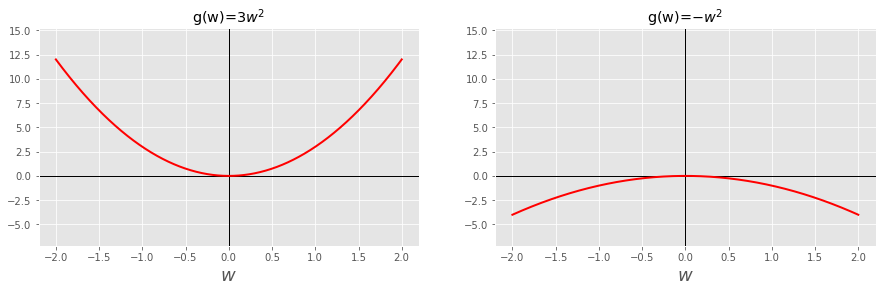

In [41]:
# create two quadratic functions
func1 = lambda w: 3*w**2 
func2 = lambda w: -w**2

# use custom plotter to show both functions
title1 = '$g(w)=$3w^2$'; title2 = '$g(w)=$-w^2$';
linlib.plotters.double_2d_plot(func1 = func1, func2 = func2,title1 = title1,title2=title2,fontsize = 18)

In three dimensions - where we have two inputs $w_1$ and $w_2$ - the same quadratic formula can be defined using a single input.  For example, using $w_1$ the formula takes the form

$$
g(w_1,w_2) = aw_1^2 + bw_1^{\,} + c
$$

In three-dimensions this looks precisely like $g(w) = aw^2 + bw + c$ stretched along the $w_2$ input dimension - forming a *half-pipe*. 

We plot the two and three dimensional versions of this quadratic side by side in the Python cell below.   

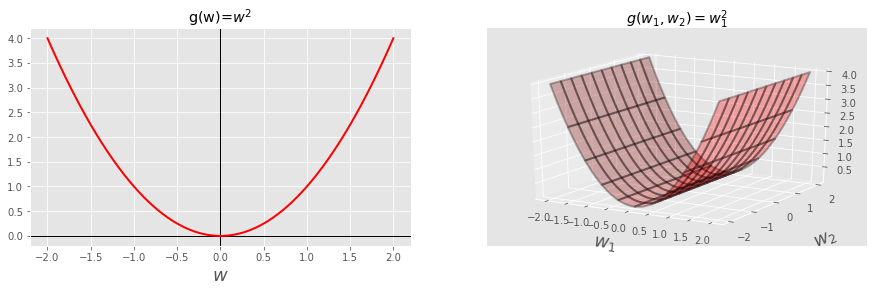

In [68]:
# plot a single input quadratic in both two and three dimensions
func1 = lambda w: w**2 
func2 = lambda w: w[0]**2

# use custom plotter to show both functions
title1 = '$g(w)=$w^2$'; title2 = '$g(w_1,w_2)=w_1^2$';
linlib.plotters.double_2d3d_plot(func1 = func1, func2 = func2,title1 = title1,title2=title2,fontsize = 18)

 And of course we can define this single input quadratic along any dimension we want.  In general if we have $N$ possible inputs $\mathbf{w}=[w_1,\,\,w_2,\,\,\cdots\,w_N]$ we can define it along the $n^{th}$ dimension as $g(\mathbf{w}) = aw_n^2 + bw_n^{\,} + c$.

## 1.2  Constructing multi-input quadratics when $N=2$

With multiple inputs we can form more complex quadratic functions by summing up a number of single input quadratics like the ones discussed above.  For example, with $N=2$ inputs if we form the two single input qudratics

$$
\begin{array}
\
g_1(w_1,w_2) = a_1 w_1^2 + b_1 w_1 + c_1 \\
g_2(w_1,w_2) = a_2 w_2^2 + b_2 w_2 + c_2 \\
\end{array}
$$

one along each input dimension.  Adding these together gives us a more complex quadratic $g(w_1,w_2) = g_1(w_1,w_2) + g_2(w_1,w_2)$ whose convexity / concavity along each input dimensinson is explicitly controlled by its corresponding single input quadratic.  

For example, in the next Python cell we plot the following single input quadratics

$$
\begin{array}
\
g_1(w_1,w_2) = w_1^2  \\
g_2(w_1,w_2) = -w_2^2 \\
\end{array}
$$

as well as their sum $g(w_1,w_2) = w_1^2 - w_2^2$  Because $g_1$ is convex, the sum $g$ is convex along the $w_1$ axis for any fixed value of $w_2$.  Conversely since $g_2$ is concave the sum $g$ is concave along the $w_2$ axis for any fixed value of $w_1$.

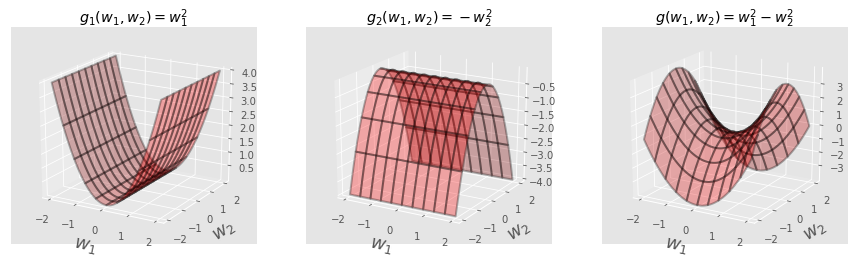

In [78]:
# plot a single input quadratic in both two and three dimensions
func1 = lambda w: w[0]**2 
func2 = lambda w: -w[1]**2

# use custom plotter to show both functions
title1 = '$g_1(w_1,w_2)=w_1^2$'; title2 = '$g_2(w_1,w_2)=-w_2^2$'; title3 = '$g(w_1,w_2)=w_1^2-w_2^2$';
linlib.plotters.triple_3dsum_plot(func1 = func1, func2 = func2,title1 = title1,title2=title2,title3=title3,fontsize = 18)

If instead we choose 

$$
\begin{array}
\
g_1(w_1,w_2) = w_1^2  \\
g_2(w_1,w_2) = w_2^2 \\
\end{array}
$$

and plot them along with their sum $g(w_1,w_2) = w_1^2 + w_2^2$ we see that the sum if convex along each coordinate axis, since each individual single input quadratic was convex.

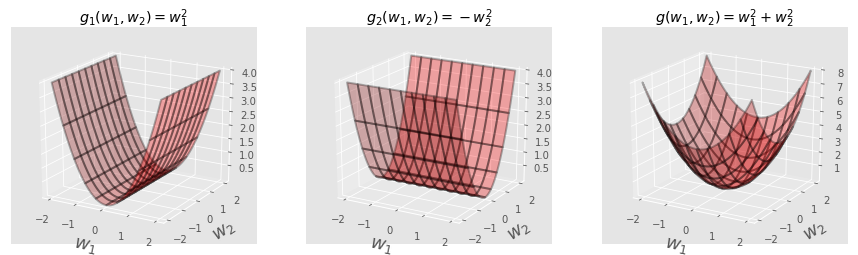

In [79]:
# plot a single input quadratic in both two and three dimensions
func1 = lambda w: w[0]**2 
func2 = lambda w: w[1]**2

# use custom plotter to show both functions
title1 = '$g_1(w_1,w_2)=w_1^2$'; title2 = '$g_2(w_1,w_2)=-w_2^2$'; title3 = '$g(w_1,w_2)=w_1^2+w_2^2$';
linlib.plotters.triple_3dsum_plot(func1 = func1, func2 = func2,title1 = title1,title2=title2,title3=title3,fontsize = 18)

For fun in the next cell we animate a smooth transition between $g(w_1,w_2) = w_1^2 - w_2^2$ and $g(w_1,w_2) = w_1^2 + w_2^2$, that is we gradually increase the coeffecient on the $w_2^2$ from $-1$ to $+1$.  You can transition from one to the other by moving the slider back and forth.


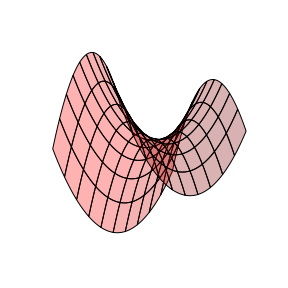
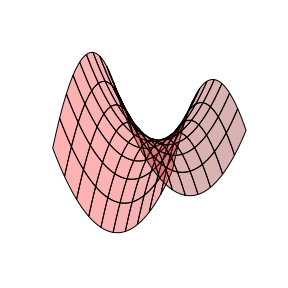
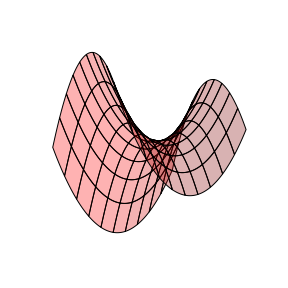
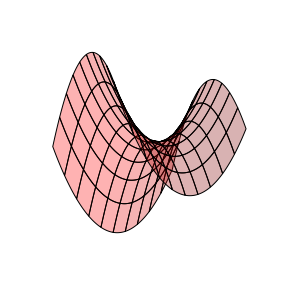
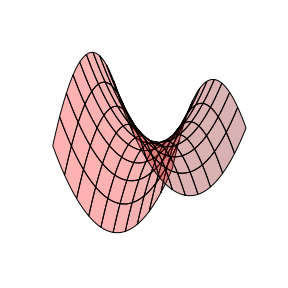
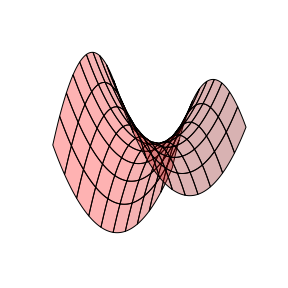
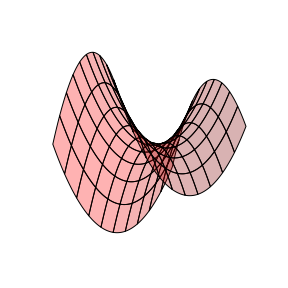
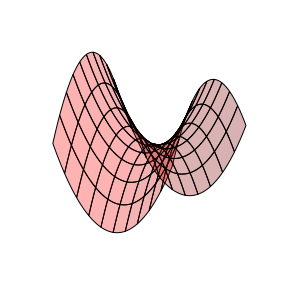
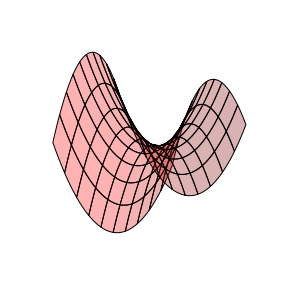
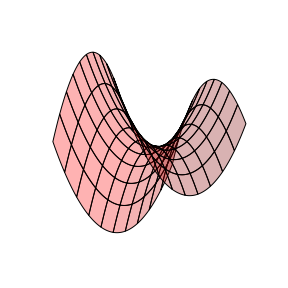
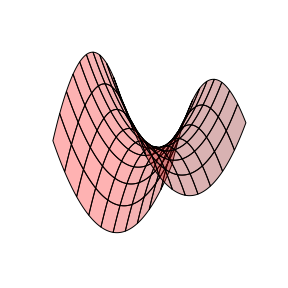
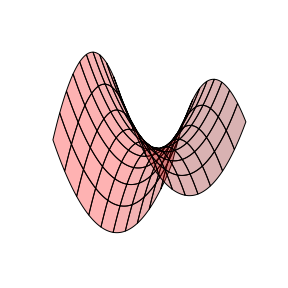
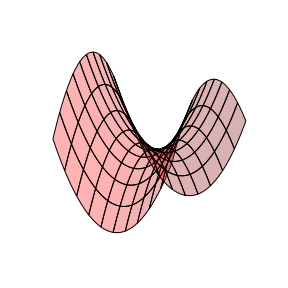
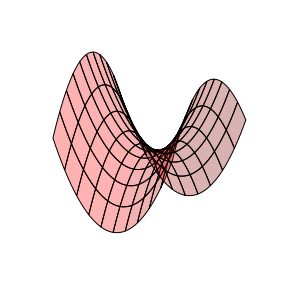
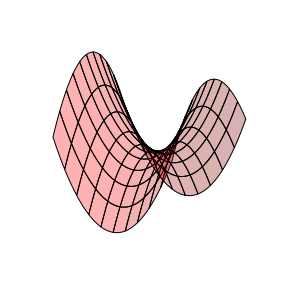
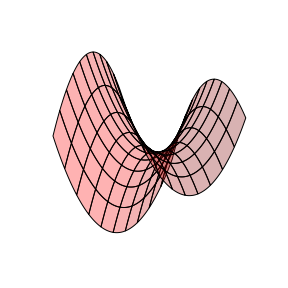
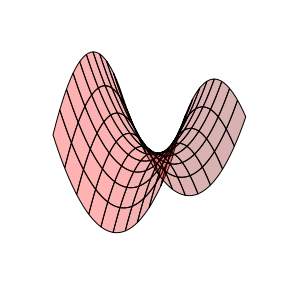
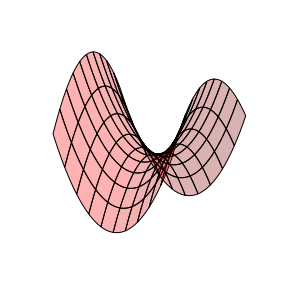
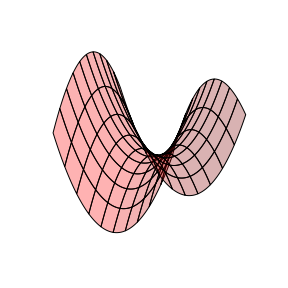
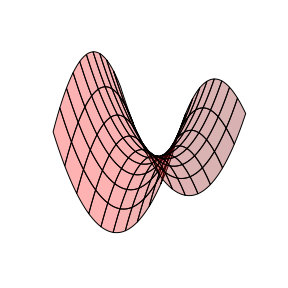
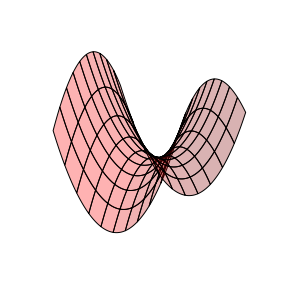
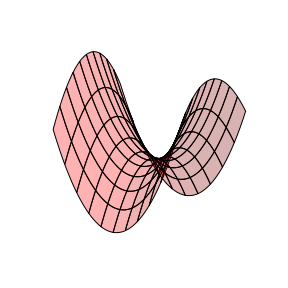
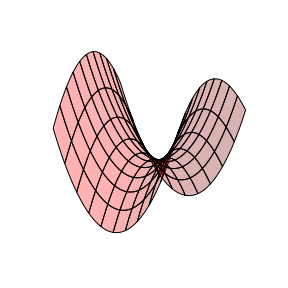
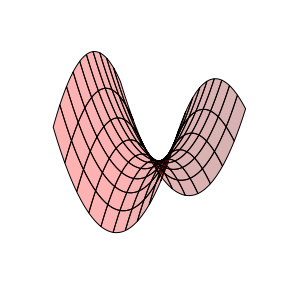
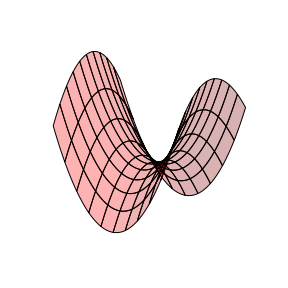
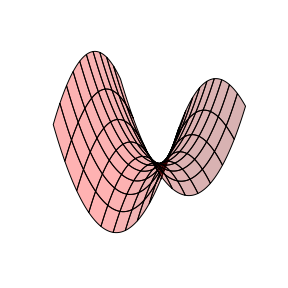
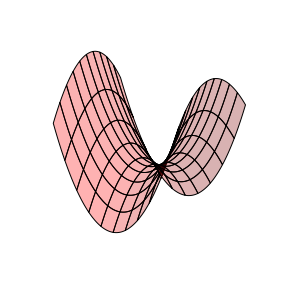
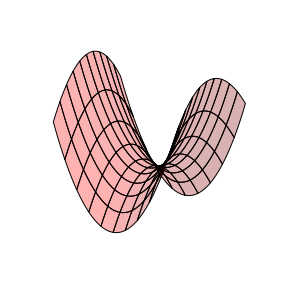
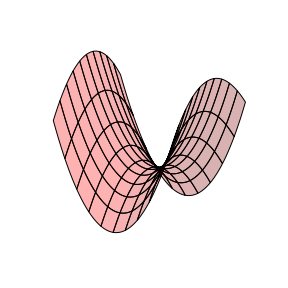
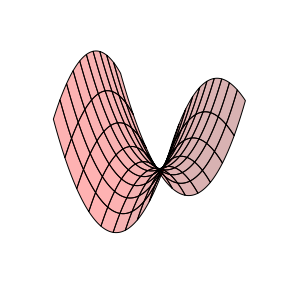
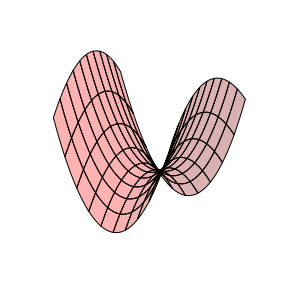
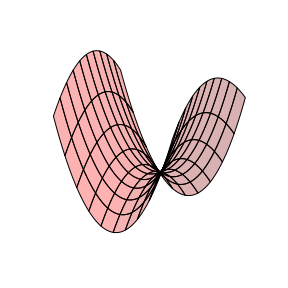
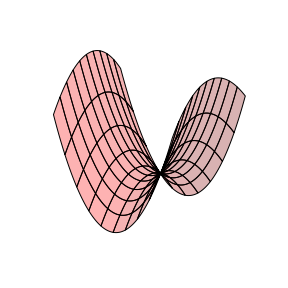
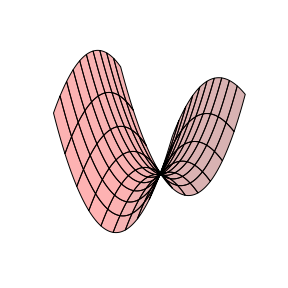
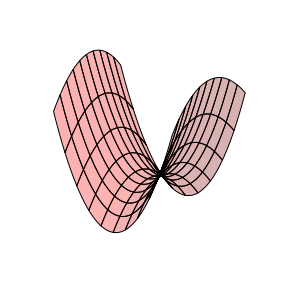
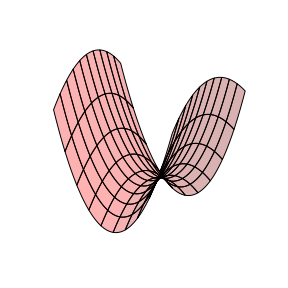
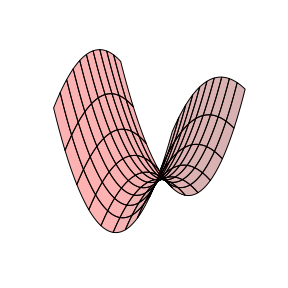
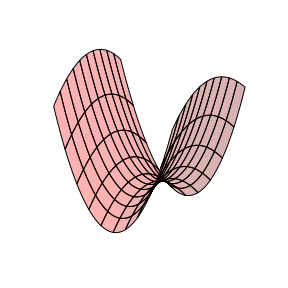
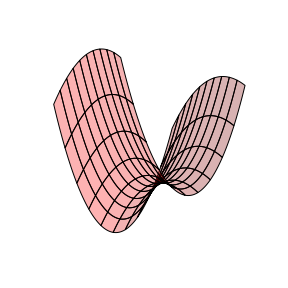
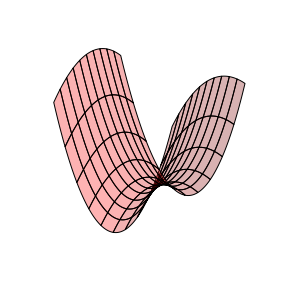
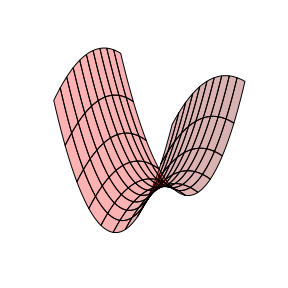
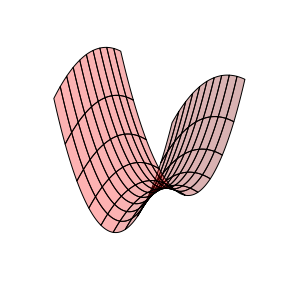
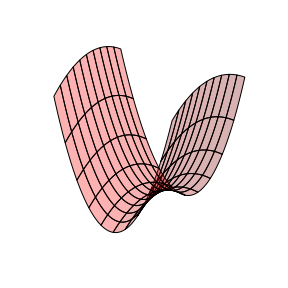
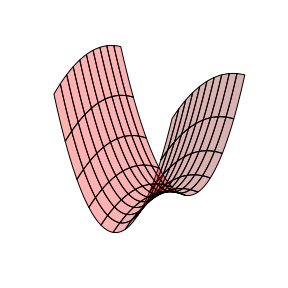
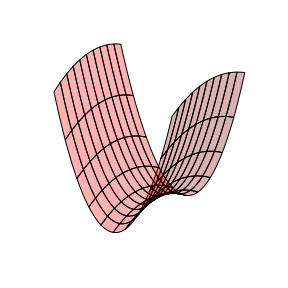
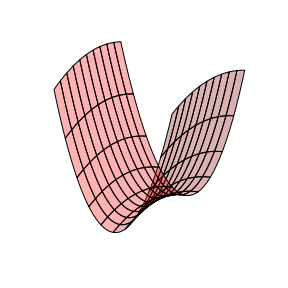
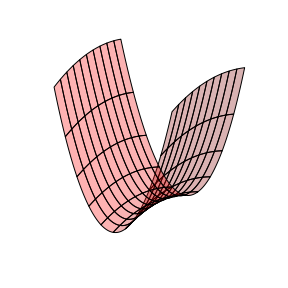
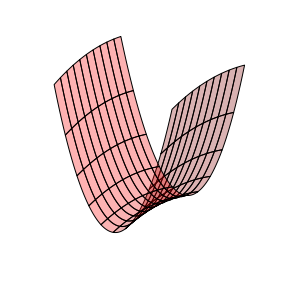
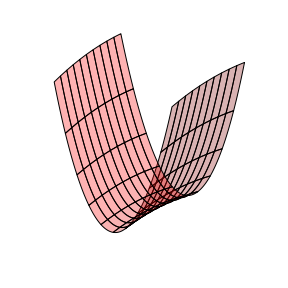
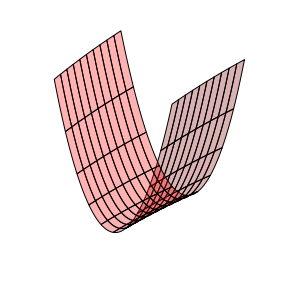
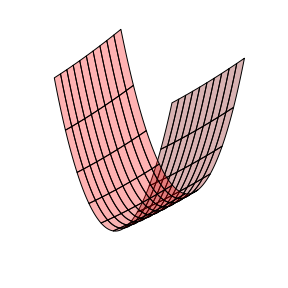
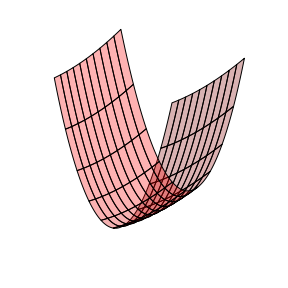
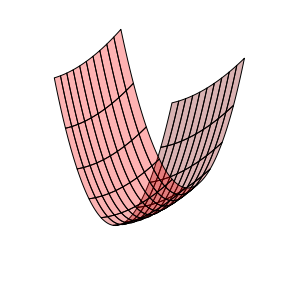
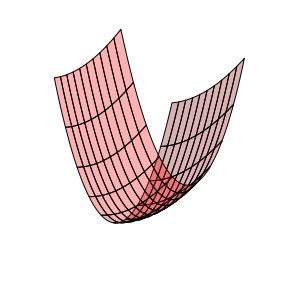
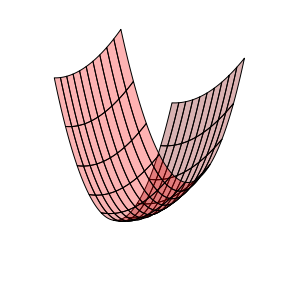
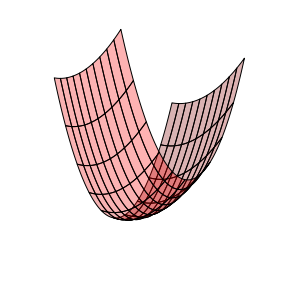
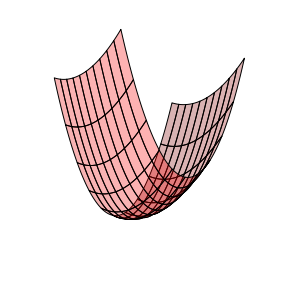
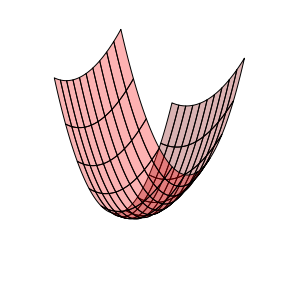
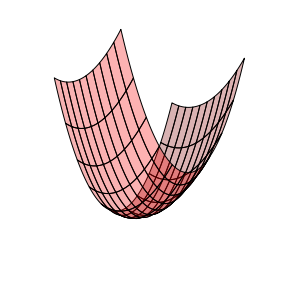
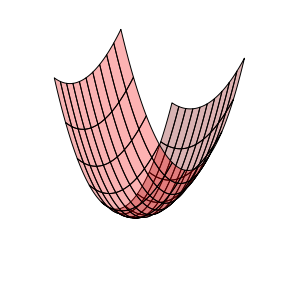
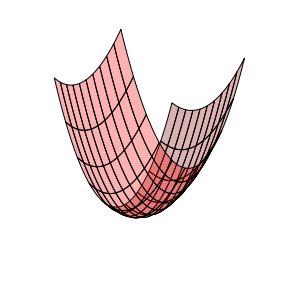
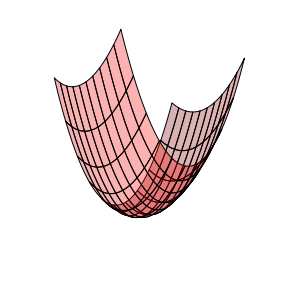
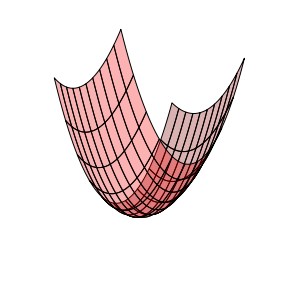
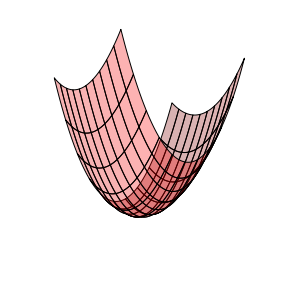
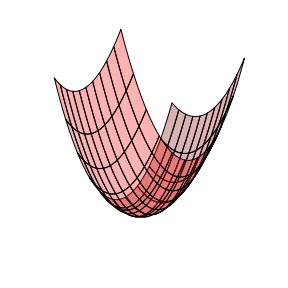
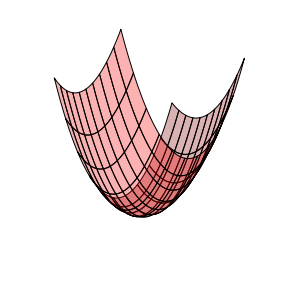
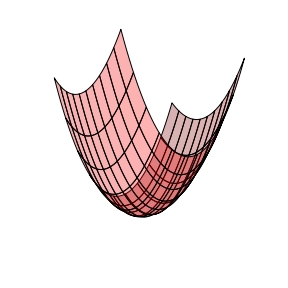
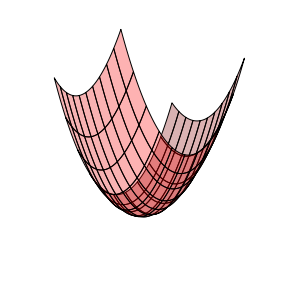
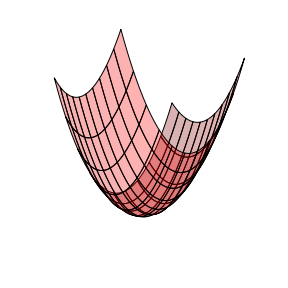
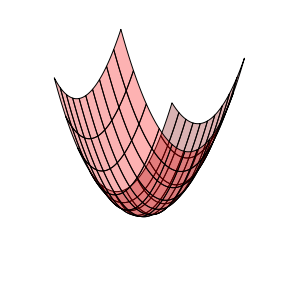
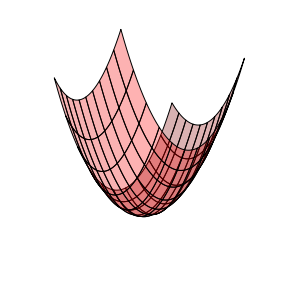
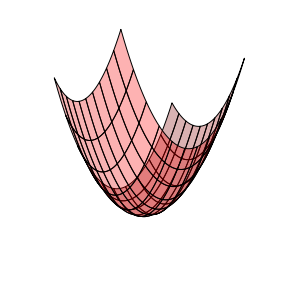
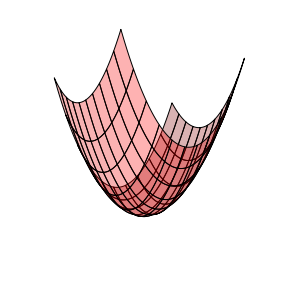
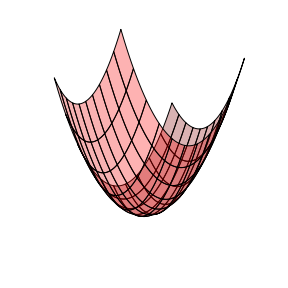
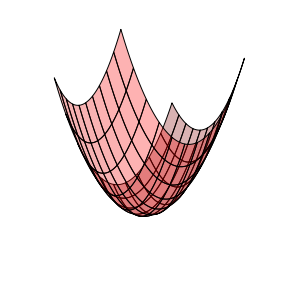
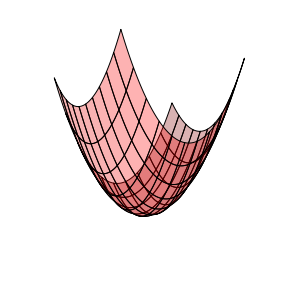
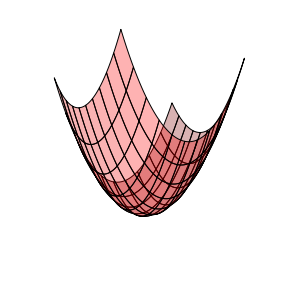
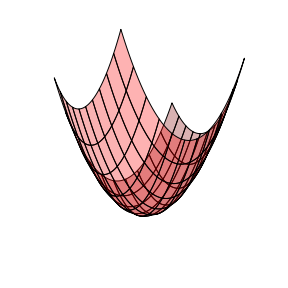
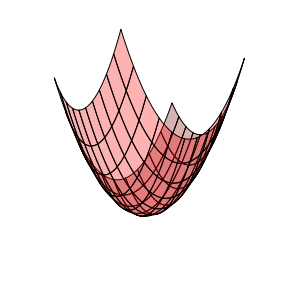
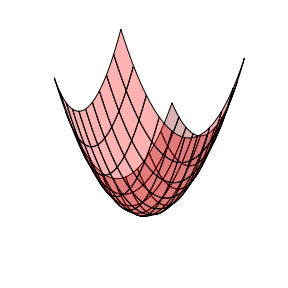
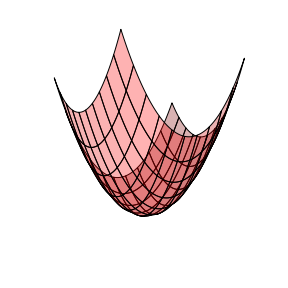
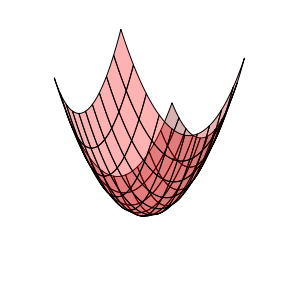
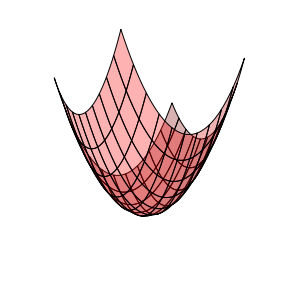
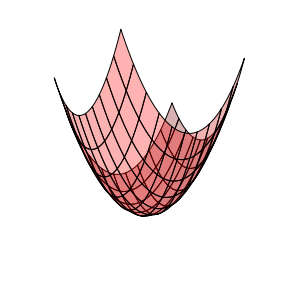
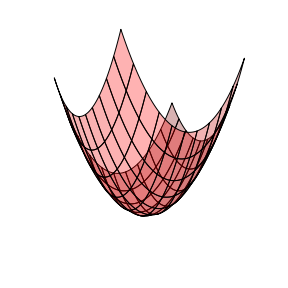
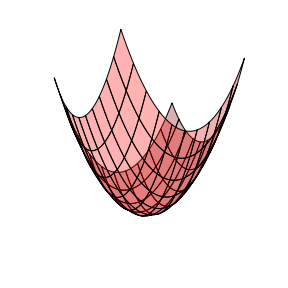
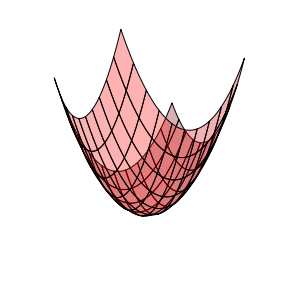
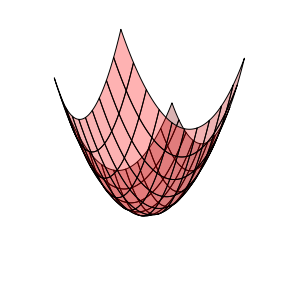
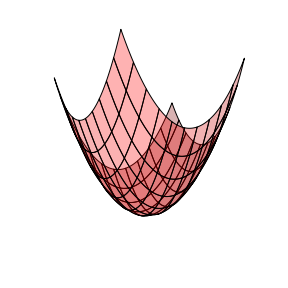
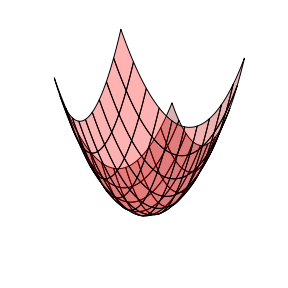
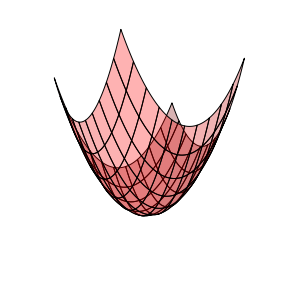
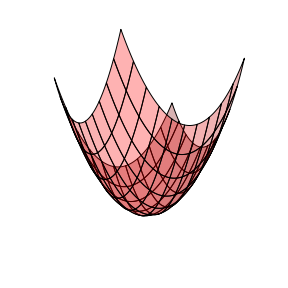
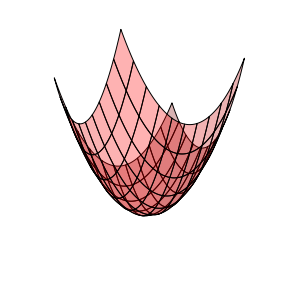
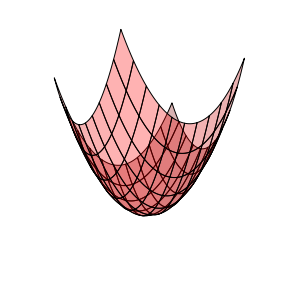
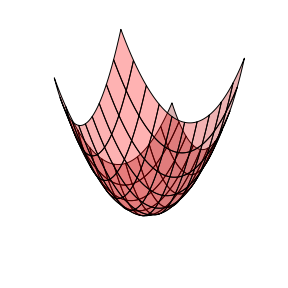
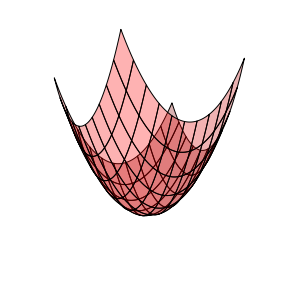
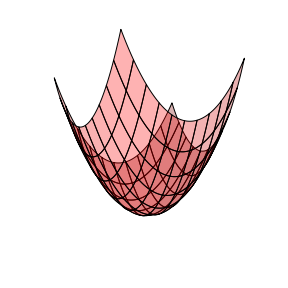
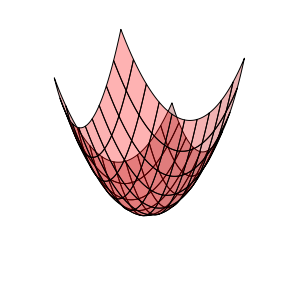
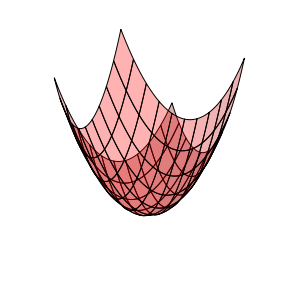
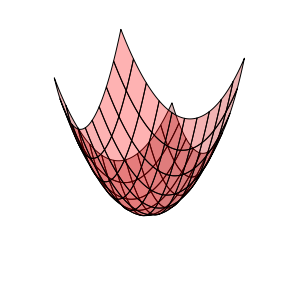

In [13]:
# animate a smooth transition between g = w_1^2 - w_2^2 and g = w_1^2 + w_2^2
# note: restart kernel if ggplot renderer has already been used (in any of the previous plots) before running - otherwise frames are very low resolutio
linlib.transform_animators.quadratic_3d_flexer.draw_it(num_slides = 100) 

---

The simple method detailed above for constructing multi-input quadratics can be used to produce every possible multi-input quadratic - up to orthogonal transformation (e.g., rotation) of the input.  In other words by summing two single-input quadratics, and then possibly transforming the input using an orthogonal matrix, we can generate every possible multi-input quadratic.

To see how this is done lets first write our multi-input quadratic using vector/matrix notation.  Summing two generic single-input quadratics gives us the general formula

$$
g(w_1,w_2) = (a_1 w_1^2 + a_2 w_2^2 ) + (b_1 w_1 + b_2 w_2) + (c_1 + c_2)
$$

which we can write more compactly in vector/matrix notation as 

$$
g(\mathbf{w}) = \mathbf{w}^T \mathbf{A} \mathbf{w} + \mathbf{b}^T \mathbf{w} + c
$$

where $\mathbf{w} = \begin{bmatrix} w_1, \\ w_2 \end{bmatrix}$, $\mathbf{b} = \begin{bmatrix} b_1 \\ b_2 \end{bmatrix}$, $c = c_1 + c_2$ and $\mathbf{A} = \begin{bmatrix}
a_{1} \,\,\,\, 0 \\
\,\,0 \,\,\,\, a_{2} \\
\end{bmatrix}$

Remember to transform any vector $\mathbf{w}$ using an orthogonal matrix $\mathbf{V}$ we simply left multiply: $\mathbf{V}\mathbf{w}$.

Now in order to e.g., rotate the input of our multi-input quadratic we simply plug in $\mathbf{Vw}$ into $g$ giving

$$
\
g(\mathbf{Vw}) = \left(\mathbf{Vw}\right)^T \mathbf{A} \left(\mathbf{Vw}\right) + \mathbf{b}^T \left(\mathbf{Vw}\right) + c \\
$$

Combining terms here we can then write this equivalently as the function $\hat{g}$ where

$$
\hat{g}(\mathbf{w})= \mathbf{w}^T \hat{\mathbf{A}} \mathbf{w} + \hat{\mathbf{b}}^T \mathbf{w} + c 
$$

where $\hat{\mathbf{A}} = \mathbf{V}^T \mathbf{A} \mathbf{V}$ and $\hat{\mathbf{b}} = \mathbf{Vb}^T$.

For example, in the next Python cell we combine the two single-input quadratics 

$$
\begin{array}
\
g_1(w_1,w_2) = w_1^2  \\
g_2(w_1,w_2) = -w_2^2 \\
\end{array}
$$

and use the two-dimensional rotation matrix 

$$
\mathbf{V} = 
\begin{bmatrix}
\text{cos}(\theta) \,\,\,\, -\text{sin}(\theta) \\
\text{sin}(\theta) \,\,\,\,\,\,\,\,\,\, \text{cos}(\theta) \\
\end{bmatrix}
$$

over a range of values for $\theta$.  For each $\theta$ we have a rotated version of the original mult-input quadratic, shown when the slider is all the way to the left.


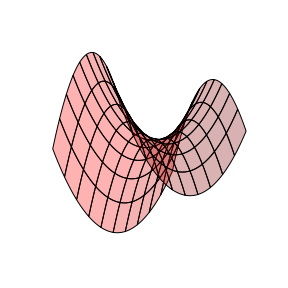
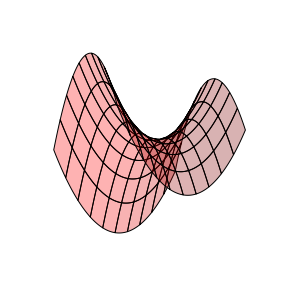
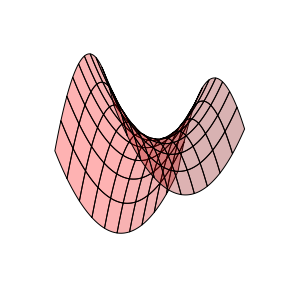
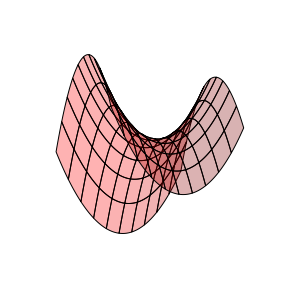
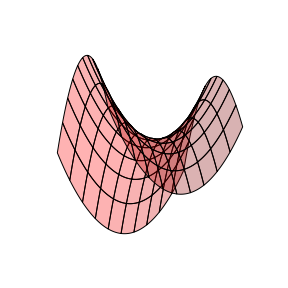
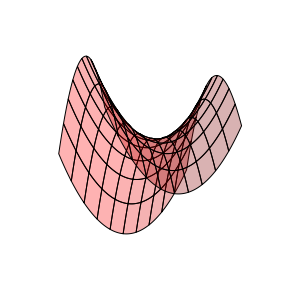
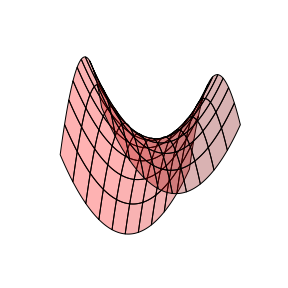
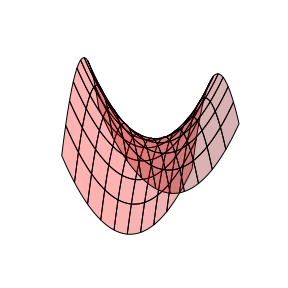
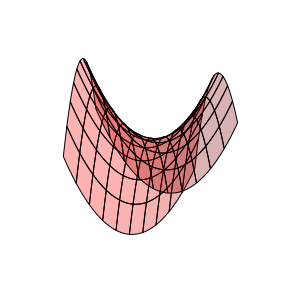
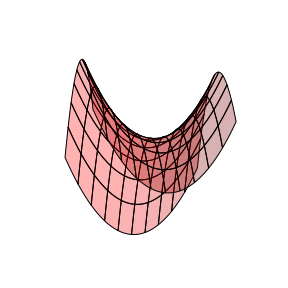
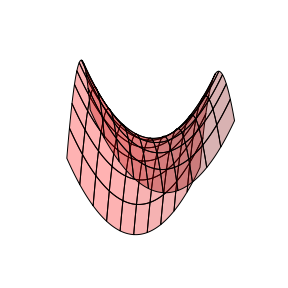
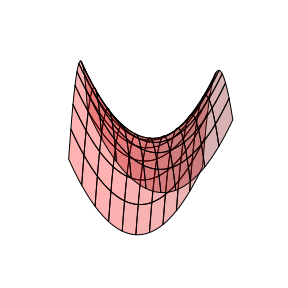
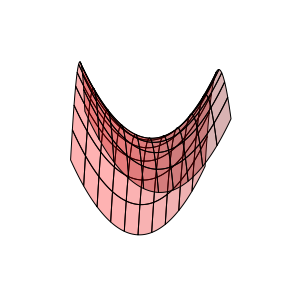
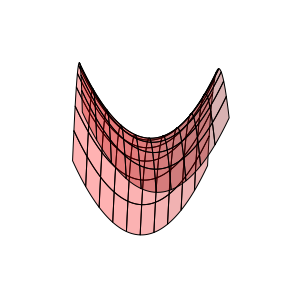
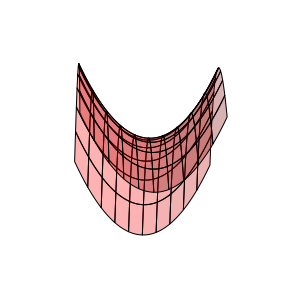
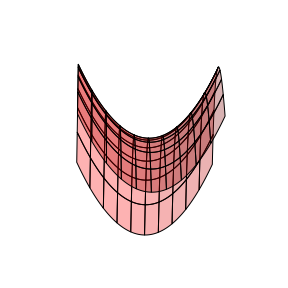
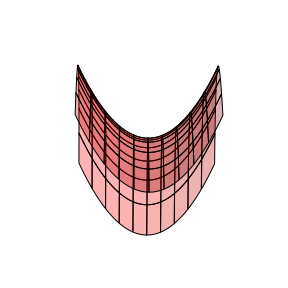
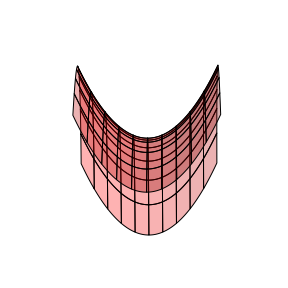
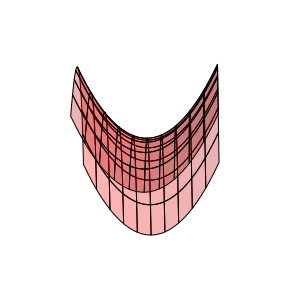
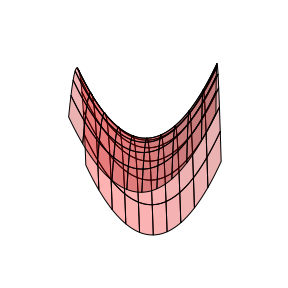
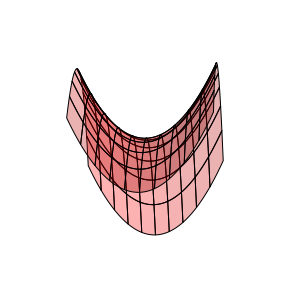
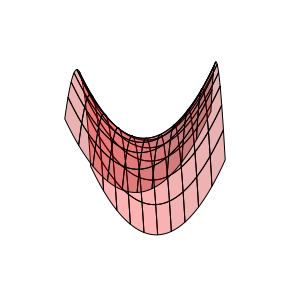
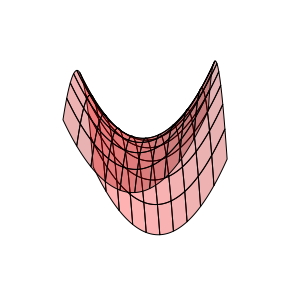
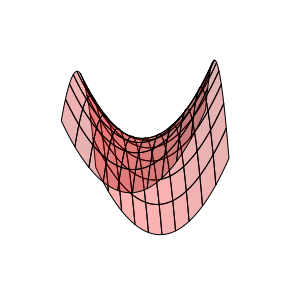
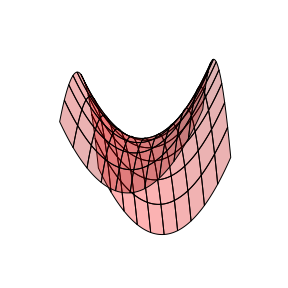
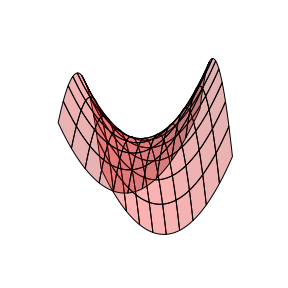
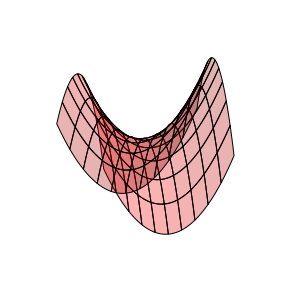
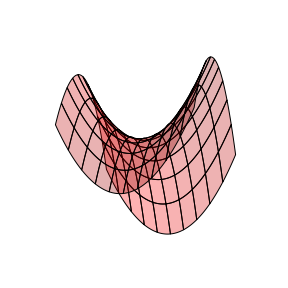
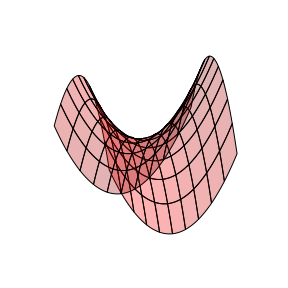
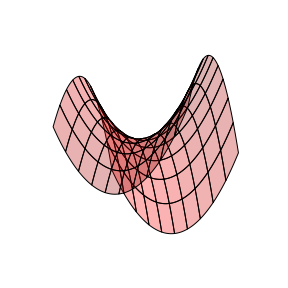
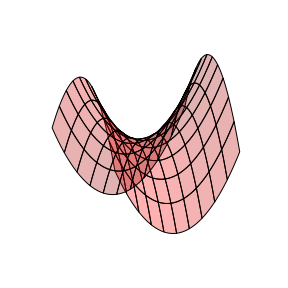
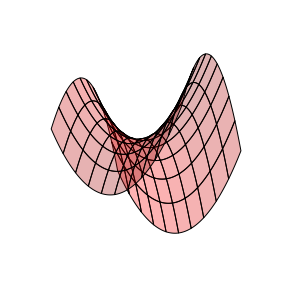
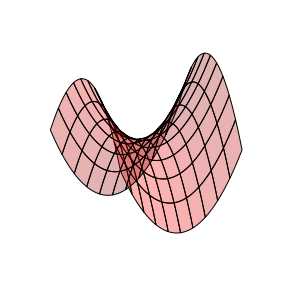
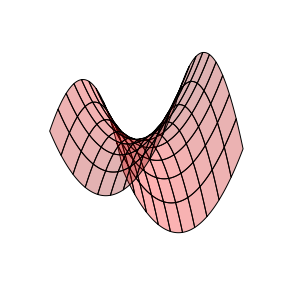
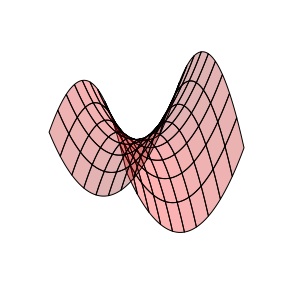
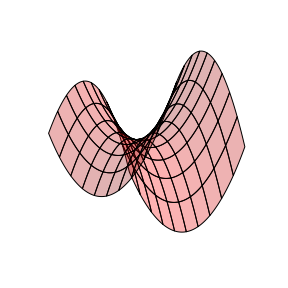
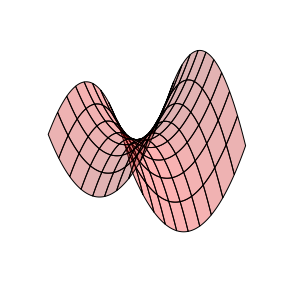
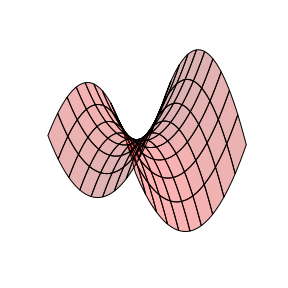
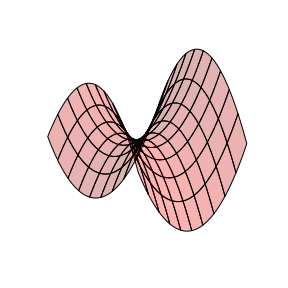
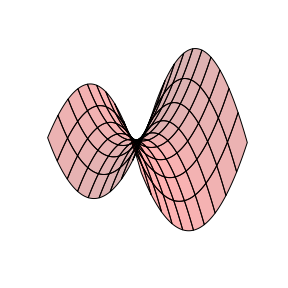
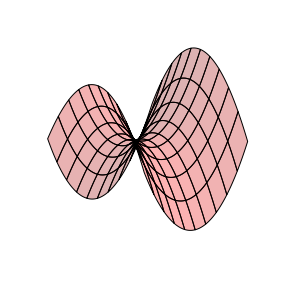
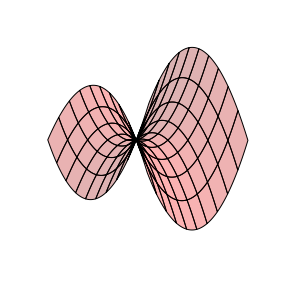
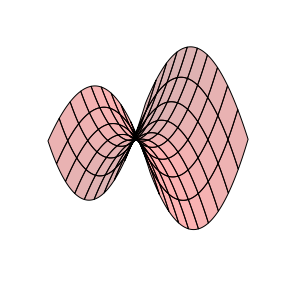
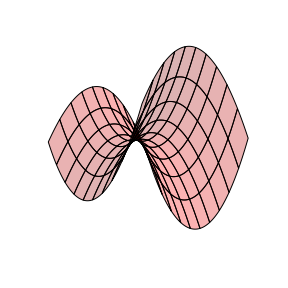
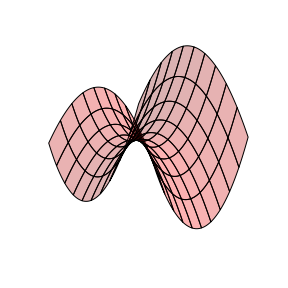
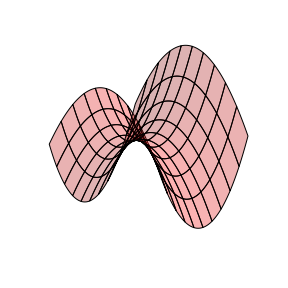
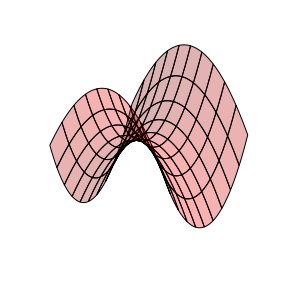
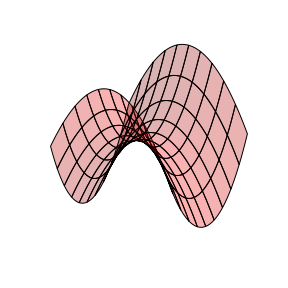
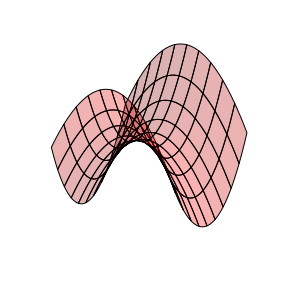
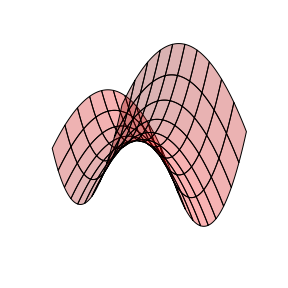
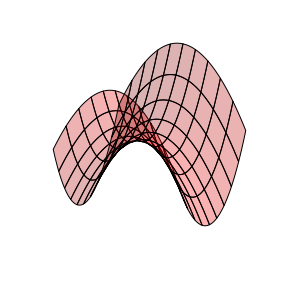
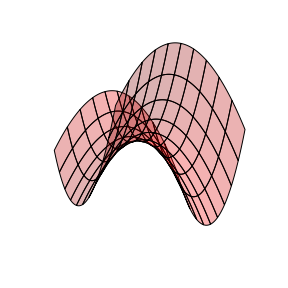
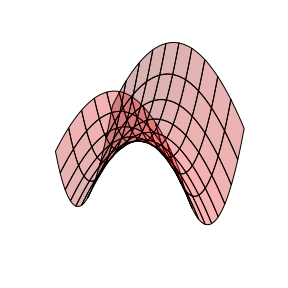
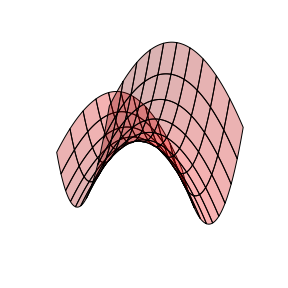
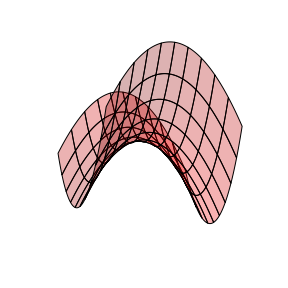
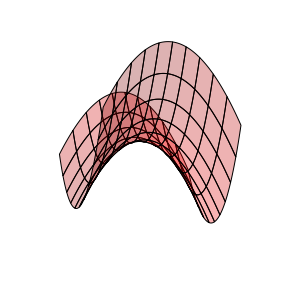
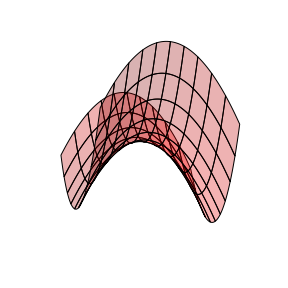
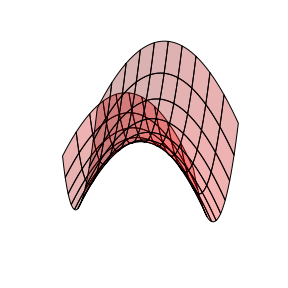
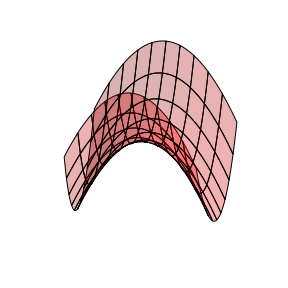
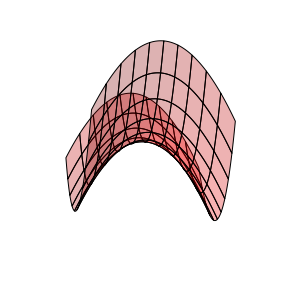
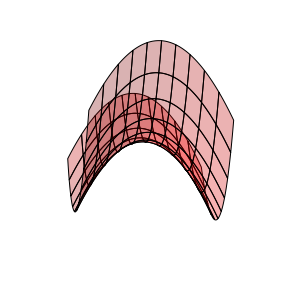
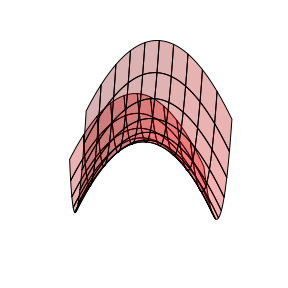
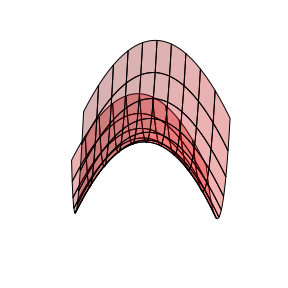
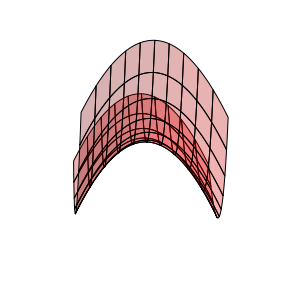
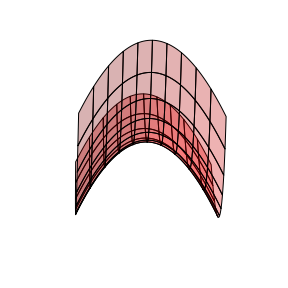
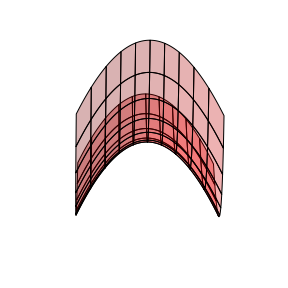
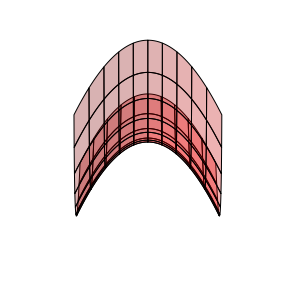
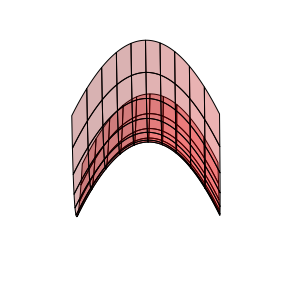
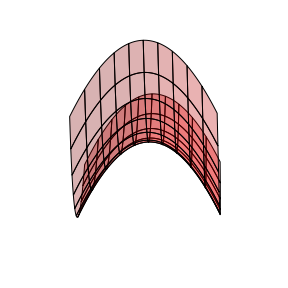
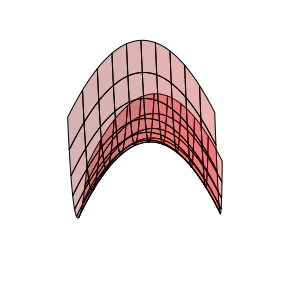
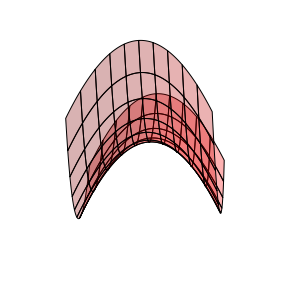
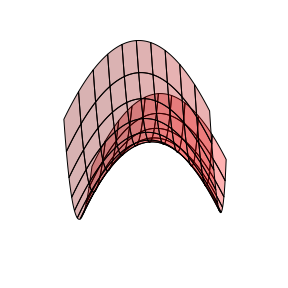
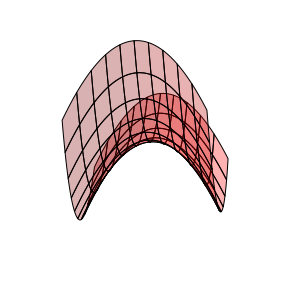
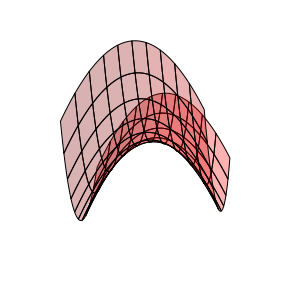
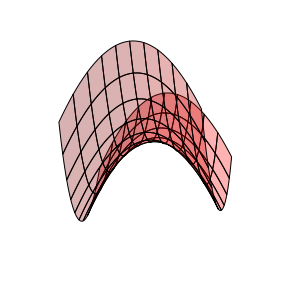
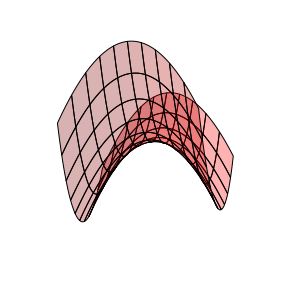
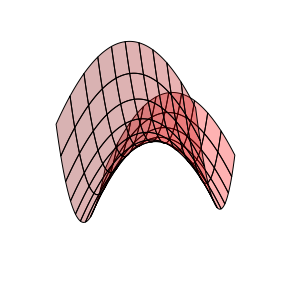
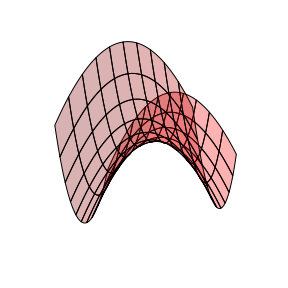
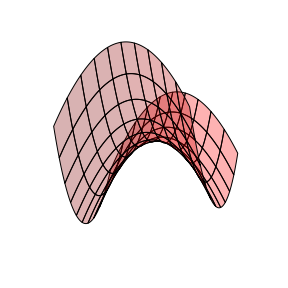
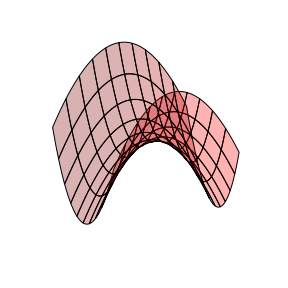
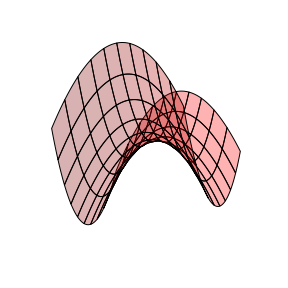
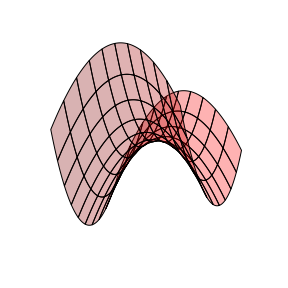
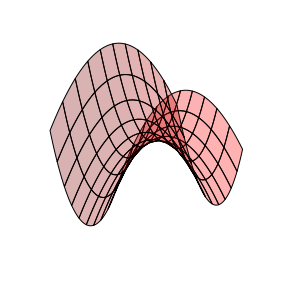
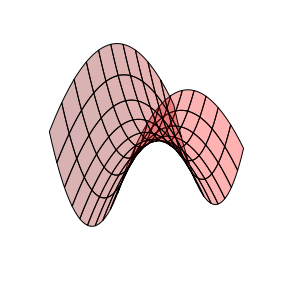
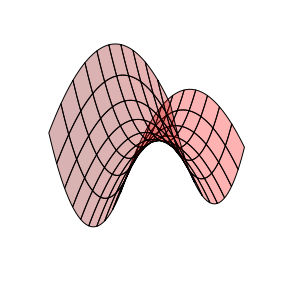
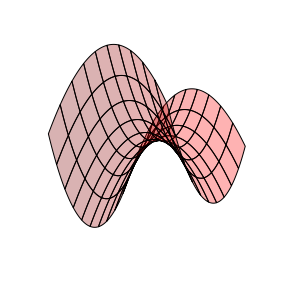
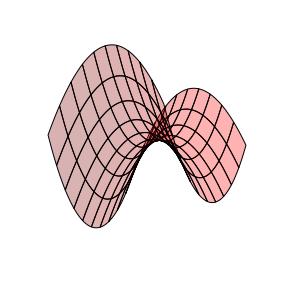
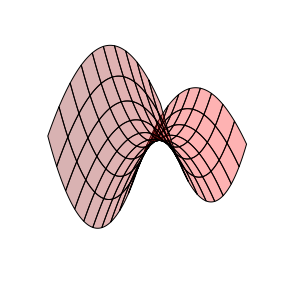
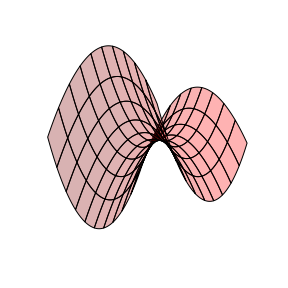
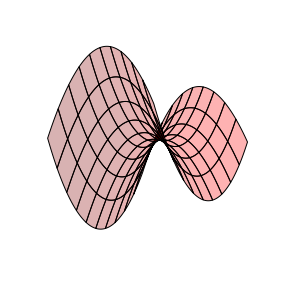
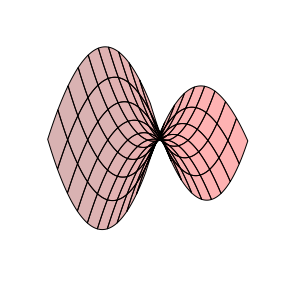
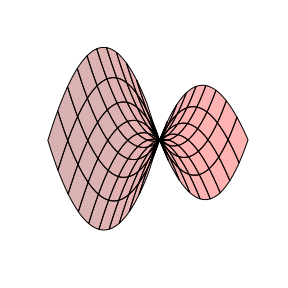
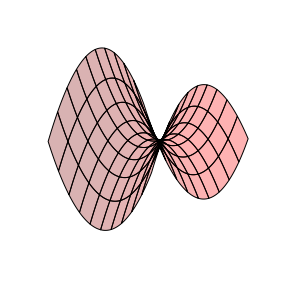
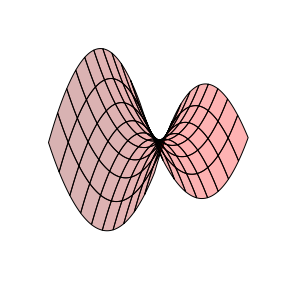
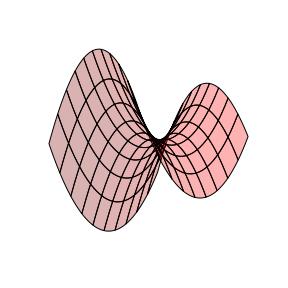
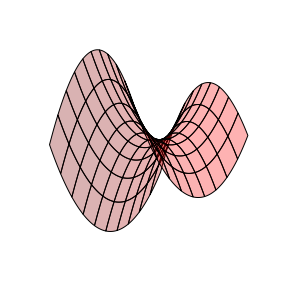
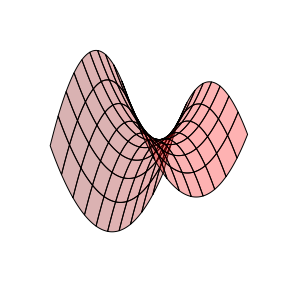
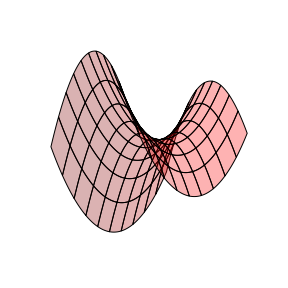
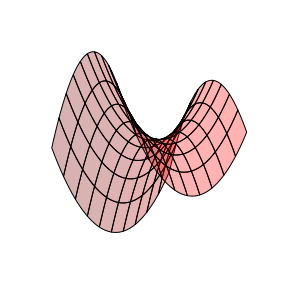
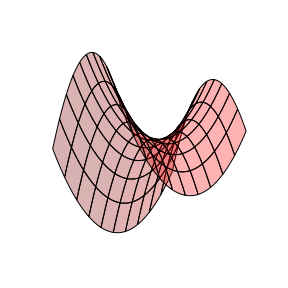

In [37]:
# rotate a quadratic 
# note: restart kernel if ggplot renderer has already been used (in any of the previous plots) before running - otherwise frames are very low resolutio
func = lambda w: w[0]**2 - w[1]**2
linlib.transform_animators.quadratic_3d_rotater.draw_it(func = func,num_slides = 100) 

### The general $N$ dimensional case

More generally for $N$ dimensional input we can define a single input quadratic along each dimension

$$
\begin{array}
\
g_1(\mathbf{w}) = a_1 w_1^2 + b_1 w_1 + c_1 \\
g_2(\mathbf{w}) = a_2 w_2^2 + b_2 w_2 + c_2 \\
\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, \vdots \\
g_N(\mathbf{w}) = a_N w_N^2 + b_N w_N + c_N \\
\end{array}
$$

and summing them up as $g(\mathbf{w}) = \sum_{n=1}^N g_n(\mathbf{w})$ gives - collecting terms

$$
g(\mathbf{w}) = (a_1 w_1^2 + a_2 w_2^2 + \cdots a_N w_N^2) + (b_1 w_1 + b_2 w_2 + \cdots b_N w_N) + (c_1 + c_2 + \cdots + c_N)
$$

We can write this formula more compactly using vector / matrix notation.  Denoting by $\mathbf{A}$ the $N\times N$ diagonal matrix

$$
\mathbf{A} = 
\begin{bmatrix}
a_1, \, 0 , \, 0 , \,\cdots \,0 \\
0, \, a_2 , \, 0 , \,\cdots \,0 \\
0, \, 0, \, a_3 , \,\cdots \,0 \\
\, \vdots \,\,\, \vdots \,\,\, \vdots \,\, \ddots \, \vdots \\
\,\,0, \, 0, \, 0 , \,\cdots \, ,a_n \\
\end{bmatrix}
$$

$\mathbf{b}$ the $N\times 1$ vector

$$
\mathbf{b} = 
\begin{bmatrix}
b_1 \\
b_2 \\
\vdots \\
b_n 
\end{bmatrix}
$$

and the constant $c = \sum_{n=1}^N c_n$ we can write the sum of $N$ single input quadratics equivalently as

$$
g(\mathbf{w}) = \mathbf{w}^T \mathbf{A} \mathbf{w} + \mathbf{b}^T \mathbf{w} + c
$$

Then using any $N\times N$ orthogonal matrix $\mathbf{V}$ this quadratic can be e.g., rotated, and we have

$$
g(\mathbf{Vw}) = \hat{g}(\mathbf{w}) = \mathbf{w}^T \hat{\mathbf{A}} \mathbf{w} + \hat{\mathbf{b}}^T \mathbf{w} + c 
$$

where $\hat{\mathbf{A}} = \mathbf{V}^T \mathbf{A} \mathbf{V}$ and $\hat{\mathbf{b}} = \mathbf{Vb}^T$.

Notice that because $\hat{\mathbf{A}}$ is a product of two orthogonal matrices and a diagonal matrix, the $n^{th}$ eigenvalue is precisely given by the $n^{th}$ value along the diagonal of $\mathbf{A}$ which is $a_n$.  We have seen how the convexity / concavity along the $n^{th}$ coordinate of a multi-input quadratic is defined by the value $a_n$, this is what controls the shape of the $n^{th}$ single input quadratic that it is built from.  From the eigenvalue perspective then we can say equivalently that the $n^{th}$ eigenvalue of $\mathbf{A}$, since it is $a_n$, controls the convexity / concavity along the $n^{th}$ input under possible transformation of an orthogonal matrix.

# 2.  Multi-input quadratics and eigenvalues

In this Section we show that every multi-input quadratic can be written in vector / matrix form as

$$
g(\mathbf{w}) = \mathbf{w}^T \mathbf{A} \mathbf{w} + \mathbf{b}^T \mathbf{w} + c
$$ 

where $\mathbf{A}$ is an $N\times N$ symmetric matrix, $\mathbf{b}$ is an $N\times 1$ vector, and $c$ is a constant.  Secondly we show that the convexity / concavity of a quadratic along its $n^{th}$ input is defined by the value of the $n^{th}$ eigenvalue of $\mathbf{A}$.  Finally we will see how this vector / matrix / eigenvalue perspective is completely equivalent to how we previously described mult-input quadratics, as built from simple single-input quadratic functions.

## 2.1  A jumping off point that leads right back to where we begun

Looking at the vector / matrix equation for the quadratic we derived in the previous Section one might reasonably wonder what happens when $\mathbf{A}$ is not diagonal.  What happens if we start with this as our definition of a quadratic,  and we plug in a general $N\times N$ matrix of the form

$$
\mathbf{A} = 
\begin{bmatrix}
a_{11}, \, a_{12} , \, a_{13} , \,\cdots \,a_{1N} \\
a_{21}, \, a_{22} , \, a_{23} , \,\cdots \,a_{2N} \\
a_{31}, \, a_{32}, \, a_{33} , \,\cdots \,a_{3N} \\
\,\,\, \vdots \,\,\,\,\,\,\, \vdots \,\,\,\,\,\,\, \vdots \,\,\,\,\,\, \ddots \,\,\,\,\, \vdots \\
a_{N1}, \, a_{N2}, \, a_{N3} , \,\cdots \,a_{NN} \\
\end{bmatrix}
$$

It seems perfectly reasonable to suspect that with such an $\mathbf{A}$ we could produce new as of yet unseen types of multi-input quadratics.  *But this suspicion is wrong, such a matrix produces a quadratic that is mathematically equivalent to the ones we have already seen, where the matrix $\mathbf{A}$ is diagonal.*   

Two short arguments can be made to verify this claim, which we now provide.  Together these two arguments show that defining a multi-input quadratic using any generic $N\times N$ matrix $\mathbf{A}$ is completely equivalent to constructing it as a sum of simple single-input quadratics, as detailed in the previous Section.

---

##### Argument 1: a quadratic can always be reformulated so that $\mathbf{A}$ is a symmetric matrix

First note that because we are using $\mathbf{A}$ to define a quadratic, regardless of its form we can always re-write $\mathbf{A}$ as a *symmetric matrix*.

Lets quickly look at the general case when $N=2$, i.e., when 

$$
\mathbf{A} = 
\begin{bmatrix}
a_{11}, \, a_{12} \\
a_{21}, \, a_{22} \\
\end{bmatrix}
$$


If we examine the vector / matrix equation for the quadratic here $g(\mathbf{w}) = \mathbf{w}^T \mathbf{A} \mathbf{w} + \mathbf{b}^T \mathbf{w} + c$ notice that the only piece that creates cross-terms in the input - that is terms that involve both $w_1$ and $w_2$ together - lie in the product involving $\mathbf{A}$.  In particular we have

$$
\mathbf{w}^T\mathbf{A}\mathbf{w} = a_{11}w_1^2 + a_{12}w_1w_2 + a_{21}w_1w_2 + a_{22}w_2^2 
$$

Now notice that we can combine the cross terms involving $w_1w_2$ and write this equivalently as 

$$
\mathbf{w}^T\mathbf{A}\mathbf{w} = a_{11}w_1^2 + 2\frac{a_{12} + a_{21}}{2}w_1w_2 + a_{22}w_2^2 
$$

which is the same result we would get if we replaced $\mathbf{A}$ with the symmetric matrix $\hat{\mathbf{A}}$ defined as 

$$
\hat{\mathbf{A}} = 
\begin{bmatrix}
a_{11}, \, \frac{a_{12} + a_{21}}{2} \\
\frac{a_{12} + a_{21}}{2}, \, a_{22} \\
\end{bmatrix}
$$

and we indeed have $\mathbf{w}^T\hat{\mathbf{A}}\mathbf{w} = \mathbf{w}^T\mathbf{A}\mathbf{w}$.

The same sort of argument can be made regardless of the value of $N$, and so we can say that any quadratic can be written where the matrix $\mathbf{A}$ is symmetric.

---

##### Argument 2: the shape of a quadratic generated by a symmetric matrix $A$ is completely defined by its eigenvalues - i.e., a diagonal matrix

If $\mathbf{A}$ is symmetric then we know it can be diagonalized as

$$
\mathbf{A} = \mathbf{V}\mathbf{D}\mathbf{V}^T
$$

where $\mathbf{V}$ is an $N\times N$ orthogonal matrix of eigenvectors, and $\mathbf{D}$ is a $N\times N$ diagonal matrix of real eigenvalues.  

Then replacing $\mathbf{A}$ with this matrix factorization and evaluating the quadratic $g$ at a general point $\mathbf{V}\mathbf{w}$ we have that

\begin{array}
\
g(\mathbf{\mathbf{V}w}) = \left(\mathbf{Vw}\right)^T \mathbf{V}\mathbf{D}\mathbf{V}^T \left(\mathbf{Vw}\right) + \mathbf{b}^T \left(\mathbf{Vw}\right) + c   \\
= \mathbf{w}^T \mathbf{V}^T \mathbf{V}\mathbf{D}\mathbf{V}^T \mathbf{V}\mathbf{w} + \mathbf{b}^T \left(\mathbf{Vw}\right) + c \\
=  \mathbf{w}^T \mathbf{D}\mathbf{w} + \hat{\mathbf{b}}^T \mathbf{w} + c
\end{array}

where we have denoted $\hat{\mathbf{b}}^T = \mathbf{b}^T \mathbf{V}$  

This shows that indeed a quadratic with symmetric matrix $\mathbf{A}$ can indeed be equivalently written as a quadratic whose matrix is diagonal, and whose diagonal elements are the eigenvalues of $\mathbf{A}$.  